In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [85]:
train_df = pd.read_csv('C:/Users/TT129/Desktop/DS Mini Projects/Loan prediction/train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
test_df = pd.read_csv('C:/Users/TT129/Desktop/DS Mini Projects/Loan prediction/test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [87]:
train_df.shape,test_df.shape

((614, 13), (367, 12))

In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [89]:
#From above train date, I found Credit_History feature is float data type (Numerical) but it is categorical feature contains only two labels 1 & 0
#Also, I found Applicant income is in int type but lets make it to float
# Hence typecast the feature from float to object
train_df['Credit_History'] =  train_df['Credit_History'].astype(object)
train_df['ApplicantIncome'] = train_df['ApplicantIncome'].astype(float)

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## EDA - Pandas Profiling

In [92]:
#from pandas_profiling import ProfileReport

In [93]:
#profile = ProfileReport(train_df,title = 'Pandas Profiling Report - Loan Prediction Train data set',explorative= True)

In [94]:
#profile.to_widgets()

## In Data Analysis We will Analyze To Find out the below
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Distribution of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature (Correlation Heat map)

## Univariate Analysis
* It is the simplest form of analyzing data where we examine each variable individually.
* For categorical features we can use frequency table or bar plot
* For numerical features, we can use probability density plots or histogram

## 1. Target variable

In [95]:
train_df['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

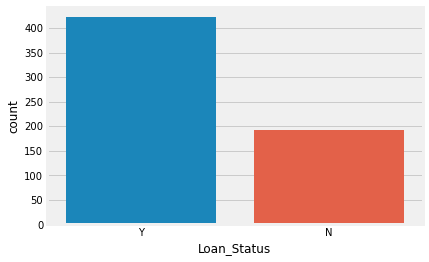

In [96]:
sns.countplot(x= 'Loan_Status',data = train_df)

### From above target feature 'Loan_Status', we can infer that  for 69% (422 out of 614) of people loan was approved

## 2. Continous/Numerical Varaibles

In [97]:
num_feature = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']
print("Number of numerical features are : ", len(num_feature))

Number of numerical features are :  4


In [98]:
train_df[num_feature].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


### Now lets Analyse the distribution of all continous/numerical features by plotting histograms

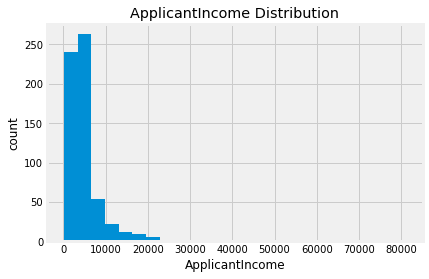

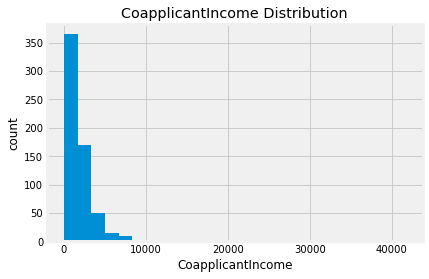

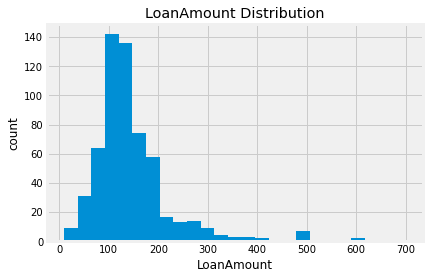

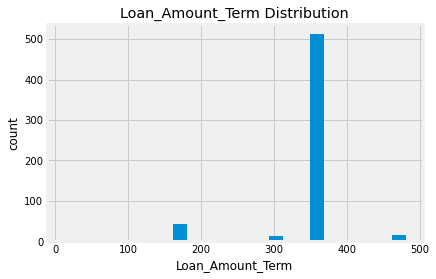

In [99]:
for feature in num_feature:
    df = train_df.copy()
    df[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature + ' Distribution')
    plt.show()

## 3. Categorical Features

In [100]:
#Since Loan_Id doesnt have impact on Target variable, we can drop it in both train and test data
train_df = train_df.drop(columns = 'Loan_ID', axis = 1)
test_df = test_df.drop(columns = 'Loan_ID', axis = 1)
cat_feature = [feature for feature in train_df.columns if df[feature].dtype == 'object']
print('Number of Categorical features are ', len(cat_feature))

Number of Categorical features are  8


In [101]:
df[cat_feature].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


### Now lets Analyse the frequency/count of all categorical features by plotting bar graphs

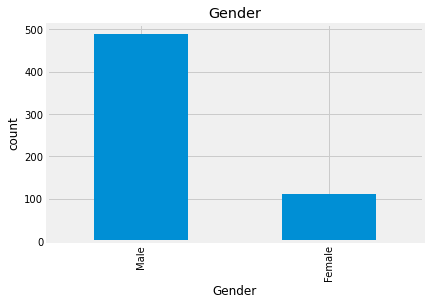

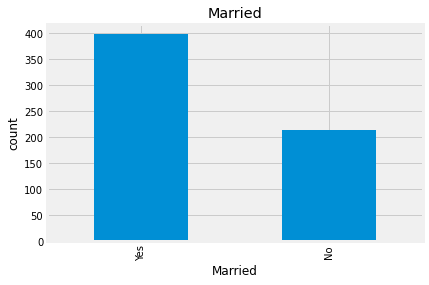

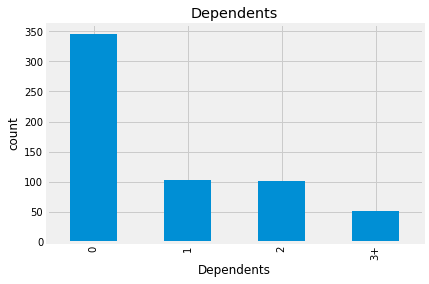

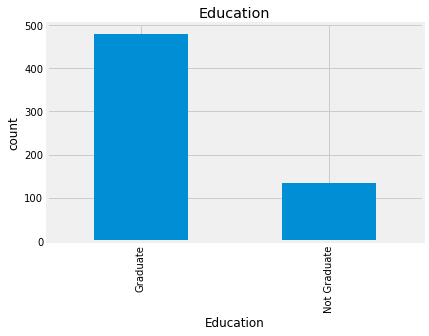

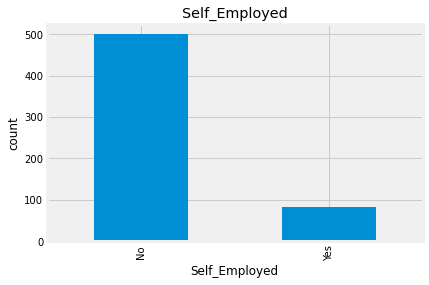

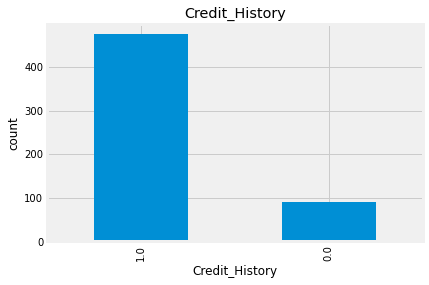

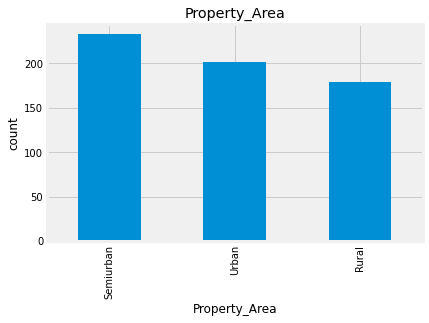

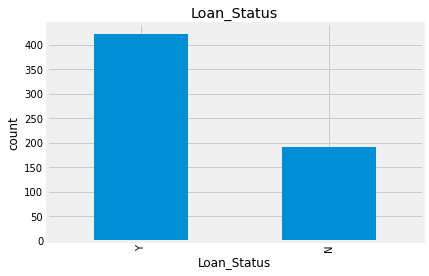

In [102]:
for feature in cat_feature:
    df = train_df.copy()   
    df[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [103]:
train_df['Gender'].value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [104]:
train_df['Married'].value_counts(normalize = True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [105]:
train_df['Dependents'].value_counts(normalize = True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [106]:
train_df['Education'].value_counts(normalize = True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [107]:
train_df['Self_Employed'].value_counts(normalize = True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [108]:
train_df['Credit_History'].value_counts(normalize = True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [109]:
train_df['Property_Area'].value_counts(normalize = True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

## Inferences on Univariate Analysis for Numerical variables
Since most of numerical variables are skewed and not normally distributed. We need to apply log transformation to normalize them and make distribution symmetric (Normally distributed)

## Inferences on Univariate Analysis for Categorical variables
1. 81% applicants for loan are Male
2. 65% applicants for loan are Married
3. 57% applicants do not have dependents
4. 78% applicants for loan are Graduates
5. 85% applicants for loan are Self Employed
6. 84% applicants for loan are having good credit history(Repaid the debts)
7. 37% applicants for loan are from Semi Urban area

## Bivariate Analysis
Now we need to check how each variable is correlated with Target Variable (Loan_status)

## Numerical variables
In bivariate Analysis, we use bar graph when both variables are continous

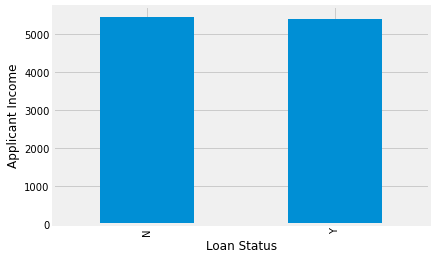

In [110]:
#Applicant Income
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

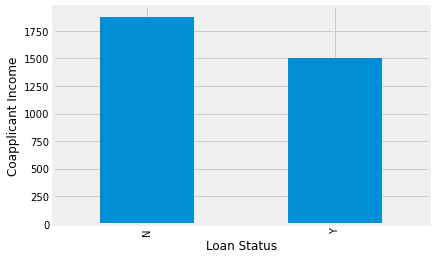

In [111]:
#Coapplicant Income
train_df.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

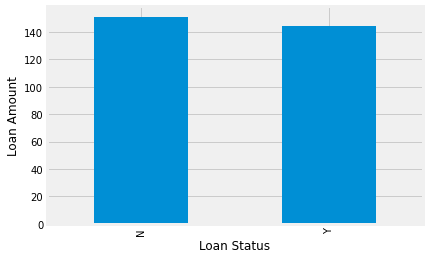

In [112]:
#Loan Amount
train_df.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

## Categorical Variables
In Bivariate Analysis, we use Cross Tab when we have both categorical variables

In [113]:
#Gender
Gender = pd.crosstab(train_df['Gender'],train_df['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


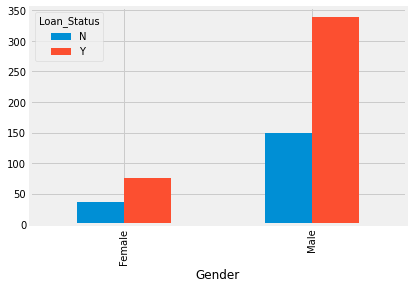

In [114]:
Gender.plot(kind="bar")

In [115]:
#Married
Married = pd.crosstab(train_df['Married'],train_df['Loan_Status'])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


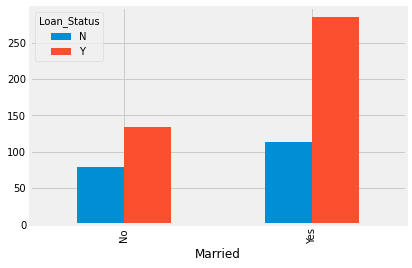

In [116]:
Married.plot(kind="bar")

In [117]:
#Dependents
Dependents = pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


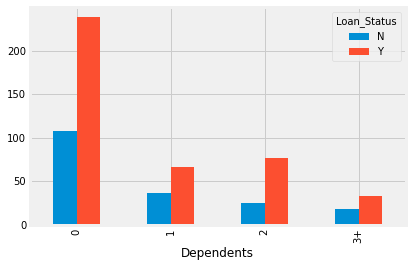

In [118]:
Dependents.plot(kind="bar")

In [119]:
#Education
Education = pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


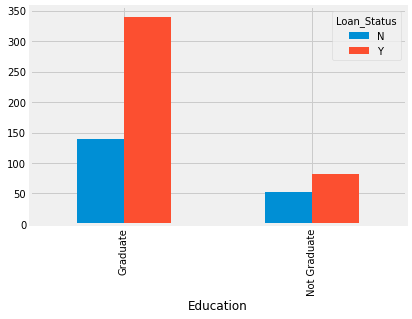

In [120]:
Education.plot(kind="bar")

In [121]:
#Self_Employed
Self_Employed = pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


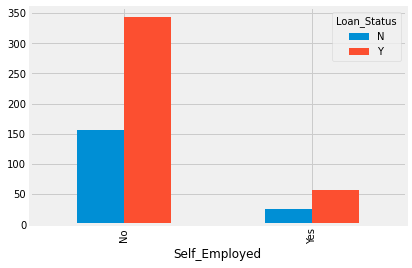

In [122]:
Self_Employed.plot(kind="bar")

In [123]:
#Credit_History
Credit_History = pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


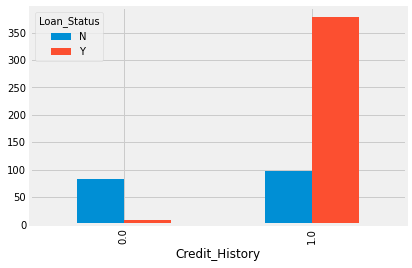

In [124]:
Credit_History.plot(kind="bar")

In [125]:
#Property_Area
Property_Area = pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


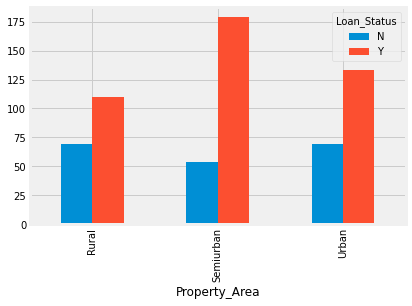

In [126]:
Property_Area.plot(kind="bar")

## Lets find Correlation Between all numeric variables
Now lets replace few vaiables and convert them from string to numerical since logistic regression takes numerical values as input

In [127]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y


In [128]:
train_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [129]:
train_df['Dependents'].replace('3+','3',inplace = True)
test_df['Dependents'].replace('3+','3',inplace = True)
train_df['Loan_Status'].replace('Y','1',inplace = True)
train_df['Loan_Status'].replace('N','0',inplace = True)

In [130]:
df = train_df.copy()
df['Loan_Status'] = df['Loan_Status'].astype(int)

In [131]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,1


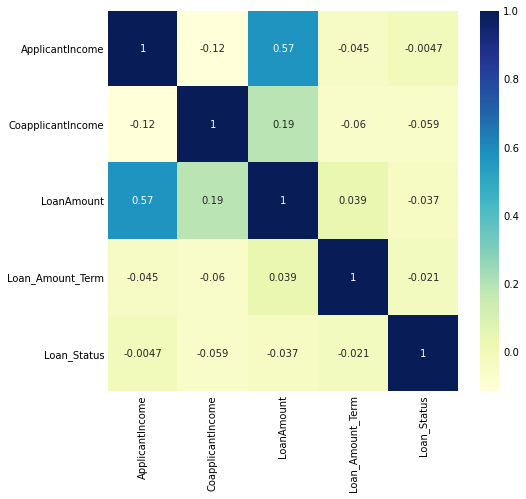

In [132]:
corrmat = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corrmat,annot= True,cmap="YlGnBu")

In [133]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,-0.021268
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,1.000000


### We see that the most correlated variable is ApplicantIncome - LoanAmount

## Inferences on Bivariate Analysis for Numerical variables with Target Varible (Loan_Status)
1. Applicant Income : Applicant income does not affect the chances of loan approval and there are no significant differences
2. Coapplicant Income : It shows coapplicant’s income is less then chances of loan approval are high. But this does not look right. As per the train data, 274 applicants(Out of 614) do not have any coapplicants hence loan approval is not dependent on Coapplicant income
3. Loan Amount : It shows chances of loan approval will be high when the loan amount is less which depicts our hypothesis

## Inferences on Bivariate Analysis for Categorical variables with Target Varible (Loan_Status)
1. Gender : Chances of getting loan approval is more for Male
2. Married : Chances of getting loan approval is more for Married
3. Dependents : Chances of getting loan approval is more who dont have any dependents
4. Education : Chances of getting loan approval is more who are graduates
5. Self employed : Chances of getting loan approval is more who are not self employed
6. Credit History : Chances of getting loan approval is more who have good credit history
7. Property Area : Chances of getting loan approval is more who live in Semi urban area

## Handling Missing Values

In [134]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## We can consider these methods to fill the missing values:

1. Numerical variables: imputation using mean or median
2. Categorical variables: imputation using mode

### Lets pull all Numerical variables and check the Missing values in train data

In [136]:
feature_num_nan = [feature for feature in train_df.columns if train_df[feature].isnull().sum()>1 and train_df[feature].dtype!='object']

for feature in feature_num_nan:
    print('{} : {}% missing values'.format(feature,np.around(train_df[feature].isnull().mean(),4)))

LoanAmount : 0.0358% missing values
Loan_Amount_Term : 0.0228% missing values


In [137]:
#In loan amount term variable,the value of 360 is repeating the most. So we will replace the missing values using the mode.
#In Loan Amount, we will use median to fill the null values as median is robust to Outliers
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0],inplace = True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace = True)

### Lets pull all Categorical variables and check the Missing values in train data

In [138]:
feature_cat_nan = [feature for feature in train_df.columns if train_df[feature].isnull().sum()>1 and train_df[feature].dtype == 'object']

for feature in feature_cat_nan:
    print('{} : {}% missing values'.format(feature,np.round(train_df[feature].isnull().mean(),4)))

Gender : 0.0212% missing values
Married : 0.0049% missing values
Dependents : 0.0244% missing values
Self_Employed : 0.0521% missing values
Credit_History : 0.0814% missing values


### There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [139]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True) 
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True) 
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True) 
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True) 
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

### We can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [140]:
test_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True) 
test_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True) 
test_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True) 
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

In [141]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [142]:
test_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Wow! Finally, all missing values are handled. Now lets check Outliers

## Outlier treatment

1. Note : Outliers works only for numerical variables and it is plotted by using Boxplot
2. Note : Based on our Univariate Analysis, we found that numerical variables are skewed and they are not normally distributed. Outliers can be treated by applying log transformation and therefore, we can make distribution symmetric(normally distributed)

### Train Data

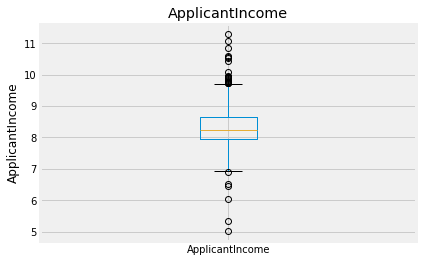

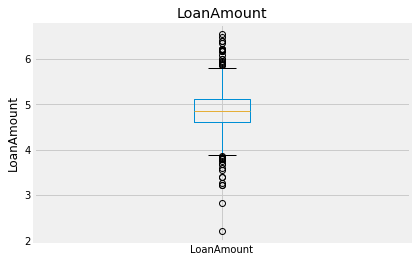

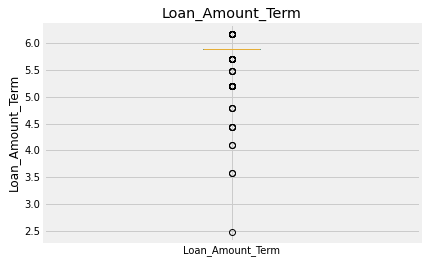

In [143]:
for feature in num_feature:
    if 0 in train_df[feature].unique():
        pass
    else:
        train_df[feature]= np.log(train_df[feature])
        train_df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show() 

### Now lets Analyse the distribution of all continous/numerical features by plotting histograms after log transformation

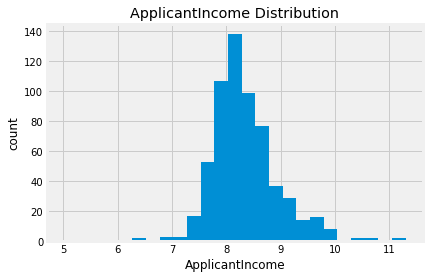

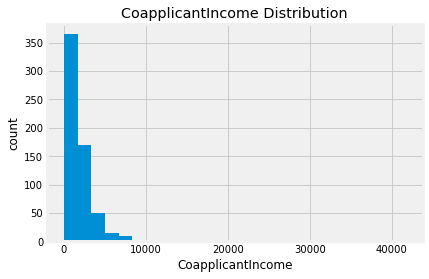

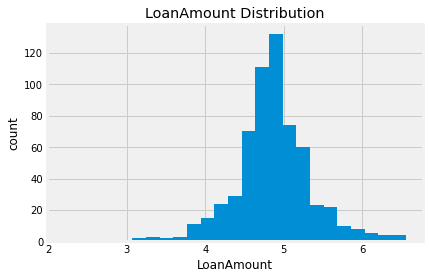

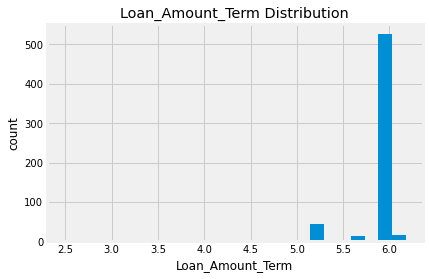

In [144]:
for feature in num_feature:
    train_df[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature + ' Distribution')
    plt.show()

### Lets apply same on test data

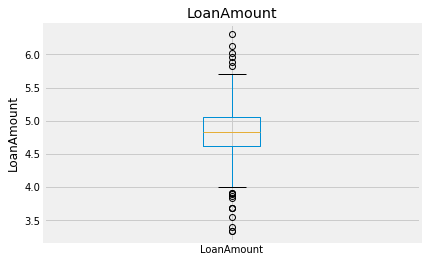

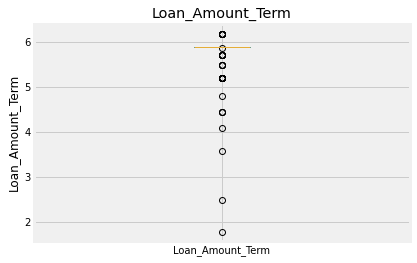

In [145]:
for feature in num_feature:
    if 0 in test_df[feature].unique():
        pass
    else:
        test_df[feature]= np.log(test_df[feature])
        test_df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show() 

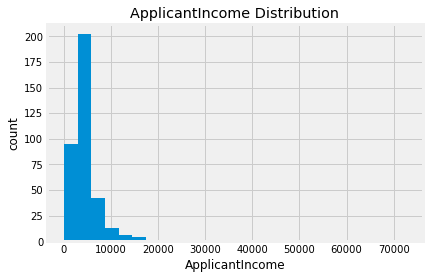

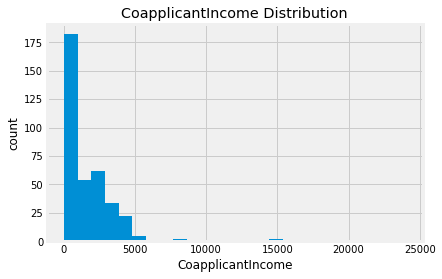

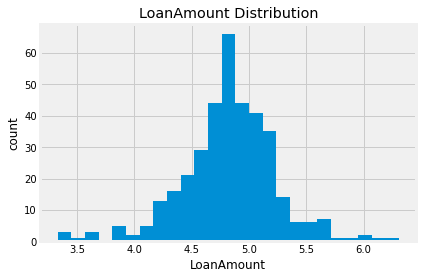

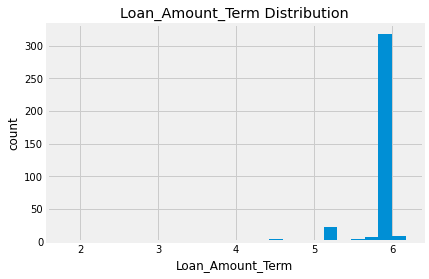

In [146]:
for feature in num_feature:
    test_df[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature + ' Distribution')
    plt.show()

### Now the distribution looks much closer to normally distributed(Symmetric) on Loan Amount variable and effect of Outliers has been reduced by log tranformation both on train and test data

## Model Building

In [147]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,4.852030,5.886104,1.0,Urban,1
1,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,1
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,1


In [148]:
train_df['Gender'].replace('Male','1',inplace = True)
train_df['Gender'].replace('Female','0',inplace = True)
train_df['Married'].replace('Yes','1',inplace = True)
train_df['Married'].replace('No','0',inplace = True)
train_df['Education'].replace('Graduate','1',inplace = True)
train_df['Education'].replace('Not Graduate','0',inplace = True)
train_df['Self_Employed'].replace('Yes','0',inplace = True)
train_df['Self_Employed'].replace('No','0',inplace = True)



#train_df = pd.get_dummies(train_df, drop_first= True)
#test_df = pd.get_dummies(test_df,drop_first= True)


In [149]:
Prop_area = pd.get_dummies(train_df['Property_Area'])
Prop_area.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [150]:
train_df = pd.concat([train_df,Prop_area],axis = 1)

In [151]:
train_df.drop(columns = 'Property_Area',inplace = True)

In [152]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,8.674026,0.0,4.852030,5.886104,1.0,1,0,0,1
1,1,1,1,1,0,8.430109,1508.0,4.852030,5.886104,1.0,0,1,0,0
2,1,1,0,1,0,8.006368,0.0,4.189655,5.886104,1.0,1,0,0,1
3,1,1,0,0,0,7.856707,2358.0,4.787492,5.886104,1.0,1,0,0,1
4,1,0,0,1,0,8.699515,0.0,4.948760,5.886104,1.0,1,0,0,1


In [153]:
test_df['Gender'].replace('Male','1',inplace = True)
test_df['Gender'].replace('Female','0',inplace = True)
test_df['Married'].replace('Yes','1',inplace = True)
test_df['Married'].replace('No','0',inplace = True)
test_df['Education'].replace('Graduate','1',inplace = True)
test_df['Education'].replace('Not Graduate','0',inplace = True)
test_df['Self_Employed'].replace('Yes','0',inplace = True)
test_df['Self_Employed'].replace('No','0',inplace = True)

In [154]:
Prop_area = pd.get_dummies(test_df['Property_Area'])
test_df = pd.concat([test_df,Prop_area],axis = 1)
test_df.drop(columns = 'Property_Area',inplace = True)

In [155]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
0,1,1,0,1,0,5720,0,4.700480,5.886104,1.0,0,0,1
1,1,1,1,1,0,3076,1500,4.836282,5.886104,1.0,0,0,1
2,1,1,2,1,0,5000,1800,5.337538,5.886104,1.0,0,0,1
3,1,1,2,1,0,2340,2546,4.605170,5.886104,1.0,0,0,1
4,1,0,0,0,0,3276,0,4.356709,5.886104,1.0,0,0,1


In [156]:
X = train_df.drop(['Loan_Status'],axis = 1)
y = train_df['Loan_Status']


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size =0.30,random_state = 100)

In [158]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state= 100)
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
pred_cv = lreg.predict(X_cv)
accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, pred_cv)
cm

array([[ 27,  36],
       [  3, 119]], dtype=int64)

In [79]:
param_grid =[{
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,10,100],
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100, 1000,2500, 5000]
}]

In [80]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=lreg, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

In [81]:
print('Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Best score: 0.8204872646733113 using best parameters {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = LogisticRegression(C = 1, max_iter= 100,penalty= 'l2',solver = 'newton-cg')
results_skfold = cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 80.95%
